# 🛠️ Data Preprocessing

## 🎯 Objective

The goal of this step is to clean and standardize the dataset to ensure high-quality input for model training.

## 🖼️ Pre-processing Images for CNN+LSTM and ViT+GPT2

##### Import libraries

In [10]:
!pip install opencv-python
!pip install torch
!pip install torchvision
!pip install PIL
!pip install transformers
!pip install numpy==1.23.5

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [11]:
import os
import numpy as np
import matplotlib
import cv2
import torch
import torchvision.transforms as transforms
from PIL import Image
from transformers import ViTImageProcessor

TypeError: 'numpy._DTypeMeta' object is not subscriptable

##### Define functions

In [15]:
# Transform cho CNN (ResNet)
cnn_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Chuẩn hóa theo ImageNet
])

def preprocess_cnn(image_path):
    image = Image.open(image_path).convert("RGB")
    return cnn_transform(image)

In [16]:
# Load ViT Image Processor
vit_processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

def preprocess_vit(image_path):
    image = Image.open(image_path).convert("RGB")
    return vit_processor(images=image, return_tensors="pt")  # Trả về tensor

c:\Users\mtue2\miniconda3\envs\us-capydata-visportic\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mtue2\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


##### Pre-processing

In [18]:
images_folder = "../data/US-Capydata-ViSportIC/images"
preprocess_cnn_folder = "../data/US-Capydata-ViSportIC/preprocessed_cnn"
preprocess_vit_folder = "../data/US-Capydata-ViSportIC/preprocessed_vit"

if not os.path.exists(preprocess_cnn_folder):
    os.makedirs(preprocess_cnn_folder)

if not os.path.exists(preprocess_vit_folder):
    os.makedirs(preprocess_vit_folder)

In [19]:
for image_filename in tqdm(image_filenames):
    image_path = os.path.join(images_folder, image_filename)
    cnn_image = preprocess_cnn(image_path)
    vit_image = preprocess_vit(image_path)
    torch.save(cnn_image, os.path.join(preprocess_cnn_folder, image_filename.replace(".jpg", ".pt")))
    torch.save(vit_image, os.path.join(preprocess_vit_folder, image_filename.replace(".jpg", ".pt")))

100%|██████████| 4923/4923 [04:06<00:00, 19.96it/s]


##### Plot images

In [20]:
# Show the different of original image and preprocessed image
import matplotlib.pyplot as plt

def visualize_preprocessing(image_path):
    # Original image
    original_img = Image.open(image_path).convert("RGB")

    # CNN preprocessed image
    processed_cnn = preprocess_cnn(image_path)
    processed_cnn_np = processed_cnn.permute(1, 2, 0).numpy()  # Chuyển tensor về numpy
    processed_cnn_np = (processed_cnn_np * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]  # Unnormalize
    processed_cnn_np = processed_cnn_np.clip(0, 1)  # Giữ giá trị trong khoảng hợp lệ

    # ViT preprocessed image
    processed_vit = preprocess_vit(image_path)["pixel_values"][0]  # Lấy tensor từ output
    processed_vit_np = processed_vit.permute(1, 2, 0).numpy()  # Chuyển tensor về numpy
    processed_vit_np = (processed_vit_np * 0.5) + 0.5  # Unnormalize ViT
    processed_vit_np = processed_vit_np.clip(0, 1)  

    # Plot
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].imshow(original_img)
    axs[0].set_title("Ảnh gốc")
    axs[0].axis("off")

    axs[1].imshow(processed_cnn_np)
    axs[1].set_title("Sau CNN Preprocessing")
    axs[1].axis("off")

    axs[2].imshow(processed_vit_np)
    axs[2].set_title("Sau ViT Preprocessing")
    axs[2].axis("off")

    plt.show()

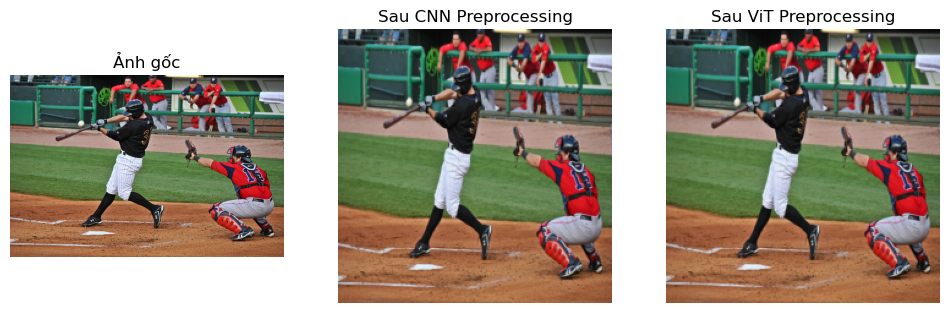

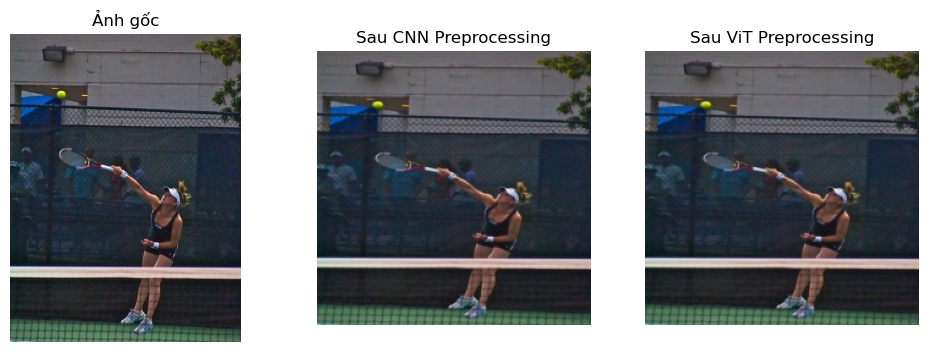

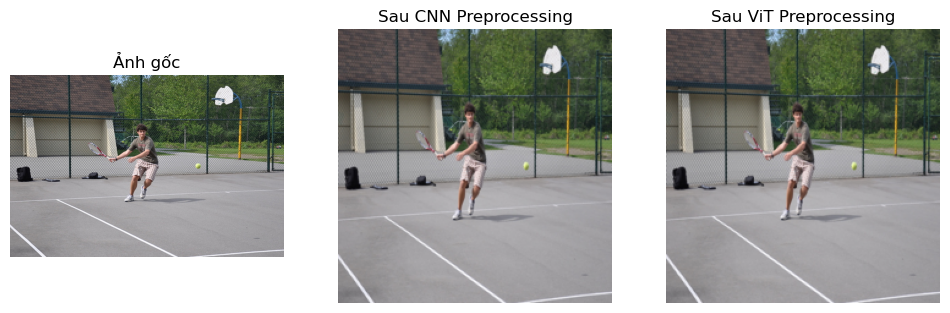

In [23]:
import random

random_indices = random.sample(range(len(image_filenames)), 3)
for i in random_indices:
    visualize_preprocessing(os.path.join(images_folder, image_filenames[i]))

## ✂️ Split train/val/test

### US-Capydata-ViSportIC dataset

In [ ]:
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

